<a href="https://colab.research.google.com/github/ArnavBhatia68/MAT-421-HW/blob/main/ModuleH_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

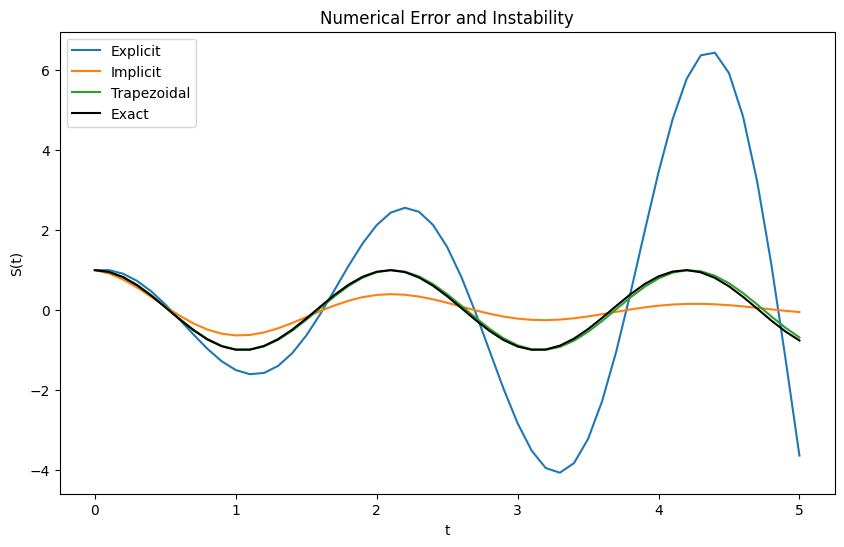

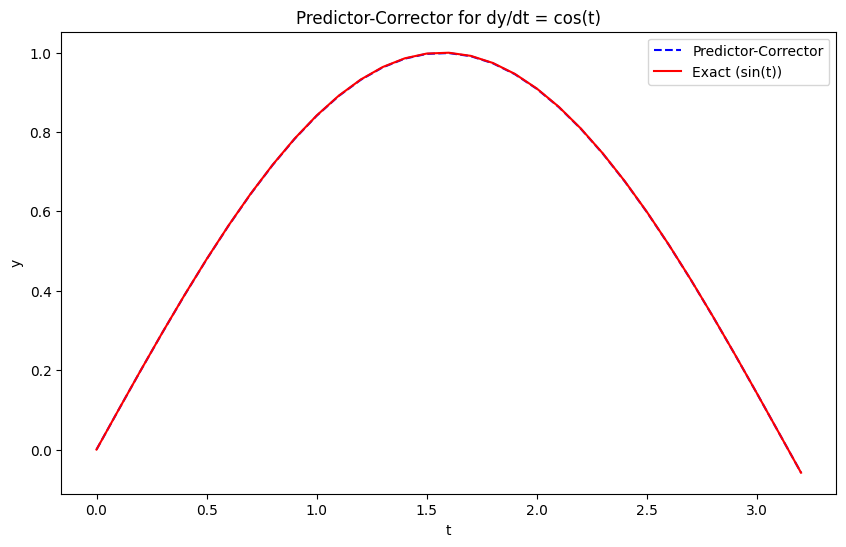

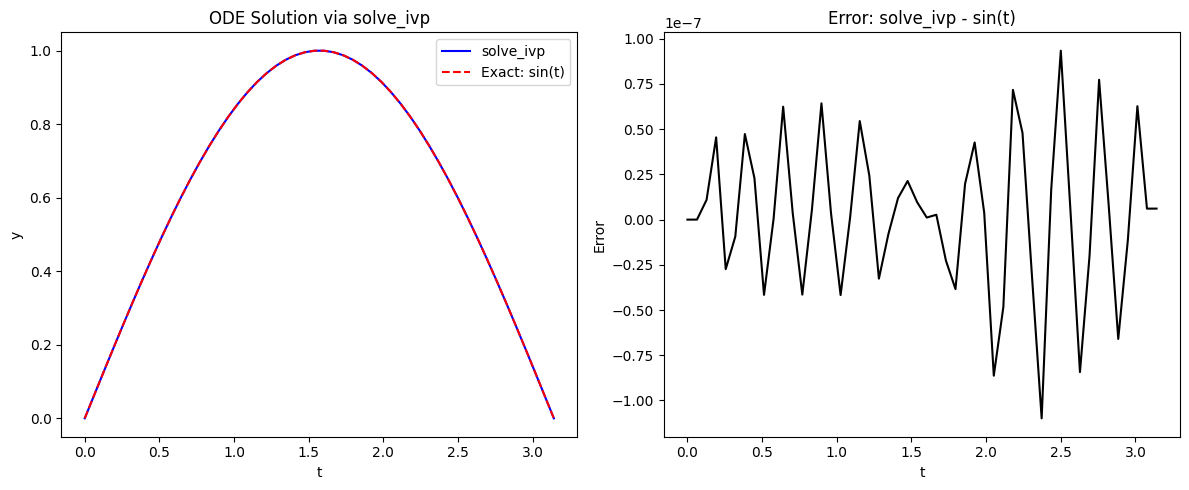

In [ ]:
# HW11 - Arnav Bhatia
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

h = 0.1
t = np.arange(0, 5.1, h)
w = 3
s0 = np.array([1, 0])

# Update matrices for three methods:
m_e = np.array([[1, h], [-w**2 * h, 1]])
m_i = np.linalg.inv(np.array([[1, -h], [w**2 * h, 1]]))
m_t = np.dot(np.linalg.inv(np.array([[1, -h/2], [w**2 * h/2, 1]])),
             np.array([[1, h/2], [-w**2 * h/2, 1]]))

# Initialize solution arrays
s_e = np.empty((len(t), 2)); s_i = np.empty((len(t), 2)); s_t = np.empty((len(t), 2))
s_e[0], s_i[0], s_t[0] = s0, s0, s0

for j in range(len(t)-1):
    s_e[j+1] = m_e @ s_e[j]
    s_i[j+1] = m_i @ s_i[j]
    s_t[j+1] = m_t @ s_t[j]

plt.figure(figsize=(10,6))
plt.plot(t, s_e[:,0], label='Explicit')
plt.plot(t, s_i[:,0], label='Implicit')
plt.plot(t, s_t[:,0], label='Trapezoidal')
plt.plot(t, np.cos(w*t), 'k', label='Exact')
plt.xlabel('t'); plt.ylabel('S(t)')
plt.title('Numerical Error and Instability')
plt.legend()
plt.show()

# ---------------------------
# 2. Predictor-Corrector Method (for ODE y' = cos(t), y(0)=0)
# Exact solution: y = sin(t)
f = lambda t, y: np.cos(t)
h = 0.1
t_pc = np.arange(0, np.pi+h, h)
y_pc = np.zeros(len(t_pc))
y_pc[0] = 0

# Simple predictor-corrector: Euler predictor then corrector via average slope
for i in range(len(t_pc)-1):
    y_pred = y_pc[i] + h * f(t_pc[i], y_pc[i])          # Predictor step
    y_pc[i+1] = y_pc[i] + (h/2) * (f(t_pc[i], y_pc[i]) + f(t_pc[i+1], y_pred))  # Corrector step

plt.figure(figsize=(10,6))
plt.plot(t_pc, y_pc, 'b--', label='Predictor-Corrector')
plt.plot(t_pc, np.sin(t_pc), 'r', label='Exact (sin(t))')
plt.xlabel('t'); plt.ylabel('y')
plt.title('Predictor-Corrector for dy/dt = cos(t)')
plt.legend()
plt.show()

#3
F = lambda t, y: np.cos(t)
t_span = [0, np.pi]
t_eval = np.linspace(0, np.pi, 50)

# Solve the ODE with tight tolerances
sol = solve_ivp(F, t_span, [0], t_eval=t_eval, rtol=1e-8, atol=1e-8)

# Exact solution and error computation
exact = np.sin(sol.t)
error = sol.y[0] - exact

# Plot the solution and error
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(sol.t, sol.y[0], 'b-', label="solve_ivp")
plt.plot(sol.t, exact, 'r--', label="Exact: sin(t)")
plt.xlabel("t")
plt.ylabel("y")
plt.title("ODE Solution via solve_ivp")
plt.legend()

plt.subplot(1,2,2)
plt.plot(sol.t, error, 'k-')
plt.xlabel("t")
plt.ylabel("Error")
plt.title("Error: solve_ivp - sin(t)")
plt.tight_layout()
plt.show()
